In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from math import pi

%matplotlib notebook

print("Tensorflow version: {0}".format(tf.__version__))

Tensorflow version: 2.0.0-beta1


In [2]:
train_vals = pd.read_csv('train_values.csv')
train_labs = pd.read_csv('train_labels.csv')
test_vals = pd.read_csv('test_values.csv')

In [3]:
print("Training values nans: {0}".format(train_vals.isnull().values.sum()))
print("Training labels nans: {0}".format(train_labs.isnull().values.sum()))
print("Testing values nans: {0}".format(test_vals.isnull().values.sum()))

Training values nans: 0
Training labels nans: 0
Testing values nans: 0


In [4]:
train_vals.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_labs.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [6]:
def make_one_hot(df, col_name, new_col_prefix):
    dist_vals = df[col_name].unique()
    for i in dist_vals:
        df["{0}_{1}".format(new_col_prefix,i)] = (df[col_name] == i).astype(int)
    df.drop(columns=[col_name,], inplace=True)

In [7]:
make_one_hot(train_vals, 'land_surface_condition', 'lsc')
make_one_hot(train_vals, 'foundation_type', 'ftyp')
make_one_hot(train_vals, 'roof_type', 'rtyp')
make_one_hot(train_vals, 'ground_floor_type', 'gft')
make_one_hot(train_vals, 'other_floor_type', 'oft')
make_one_hot(train_vals, 'position', 'pos')
make_one_hot(train_vals, 'plan_configuration', 'pconf')
make_one_hot(train_vals, 'legal_ownership_status', 'los')

In [8]:
make_one_hot(test_vals, 'land_surface_condition', 'lsc')
make_one_hot(test_vals, 'foundation_type', 'ftyp')
make_one_hot(test_vals, 'roof_type', 'rtyp')
make_one_hot(test_vals, 'ground_floor_type', 'gft')
make_one_hot(test_vals, 'other_floor_type', 'oft')
make_one_hot(test_vals, 'position', 'pos')
make_one_hot(test_vals, 'plan_configuration', 'pconf')
make_one_hot(test_vals, 'legal_ownership_status', 'los')

In [9]:
make_one_hot(train_labs, 'damage_grade', 'dg')

In [10]:
print('Train dataset shape: {0}'.format(train_vals.shape))
print('Test dataset shape: {0}'.format(test_vals.shape))

Train dataset shape: (260601, 69)
Test dataset shape: (86868, 69)


In [11]:
train_vals.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,pconf_m,pconf_c,pconf_a,pconf_n,pconf_f,pconf_o,los_v,los_a,los_r,los_w
0,802906,6,487,12198,2,30,6,5,1,1,...,0,0,0,0,0,0,1,0,0,0
1,28830,8,900,2812,2,10,8,7,0,1,...,0,0,0,0,0,0,1,0,0,0
2,94947,21,363,8973,2,10,5,5,0,1,...,0,0,0,0,0,0,1,0,0,0
3,590882,22,418,10694,2,10,6,5,0,1,...,0,0,0,0,0,0,1,0,0,0
4,201944,11,131,1488,3,30,8,9,1,0,...,0,0,0,0,0,0,1,0,0,0


In [12]:
train_labs.head()

,building_id,dg_3,dg_2,dg_1
0,802906,1,0,0
1,28830,0,1,0
2,94947,1,0,0
3,590882,0,1,0
4,201944,1,0,0


In [13]:
test_vals.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,pconf_c,pconf_m,pconf_s,pconf_o,pconf_f,pconf_n,los_v,los_a,los_w,los_r
0,300051,17,596,11307,3,20,7,6,0,1,...,0,0,0,0,0,0,1,0,0,0
1,99355,6,141,11987,2,25,13,5,0,1,...,0,0,0,0,0,0,1,0,0,0
2,890251,22,19,10044,2,5,4,5,0,1,...,0,0,0,0,0,0,1,0,0,0
3,745817,26,39,633,1,0,19,3,0,0,...,0,0,0,0,0,0,1,0,0,0
4,421793,17,289,7970,3,15,8,7,0,1,...,0,0,0,0,0,0,1,0,0,0


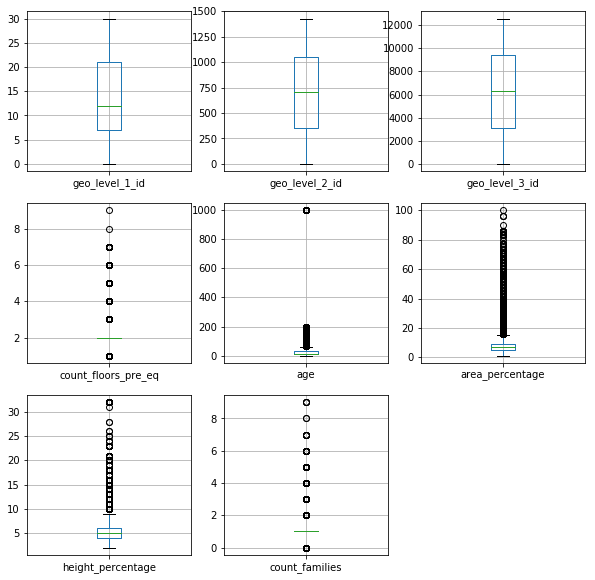

In [14]:
int_cols = ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage', 'count_families']
fig = plt.figure(figsize=(10,10))
for idx, i in enumerate(int_cols):
    plt.subplot(3,3,idx + 1)
    train_vals.boxplot(column = i)
plt.show()

In [15]:
#X_train, X_val, y_train, y_val = train_test_split(train_vals.iloc[:, 1:].values, train_labs.iloc[:, 1:].values, test_size=0.10, random_state=123)
X_train = train_vals.iloc[:, 1:].values
y_train = train_labs.iloc[:, 1:].values
X_test = test_vals.iloc[:, 1:].values

In [16]:
print("Train shapes: {0} {1}".format(X_train.shape, y_train.shape))
#print("Val shapes: {0} {1}".format(X_val.shape, y_val.shape))
print("Test shapes: {0}".format(X_test.shape))

Train shapes: (260601, 68) (260601, 3)
Test shapes: (86868, 68)


In [17]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64, kernel_initializer=tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None), input_shape=(68,)))
model.add(tf.keras.layers.LeakyReLU(alpha=0.3))
#model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(32, kernel_initializer=tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None)))
model.add(tf.keras.layers.LeakyReLU(alpha=0.3))
#model.add(tf.keras.layers.Dropout(0.1))
#model.add(tf.keras.layers.Lambda(lambda x: (1/(2*pi*1)**(0.5))*tf.keras.backend.exp(-0.5*(x-0)**2/1)))
model.add(tf.keras.layers.Dense(16, kernel_initializer=tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None)))
model.add(tf.keras.layers.LeakyReLU(alpha=0.3))
model.add(tf.keras.layers.Dense(3, kernel_initializer=tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None), activation='softmax'))

In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                4416      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 5

In [20]:
history = model.fit(X_train, y_train, epochs=500, validation_split = 0.1)

W0709 07:20:42.402482 139935742101248 deprecation.py:323] From /home/malolan98/.local/lib/python3.5/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 234540 samples, validate on 26061 samples
Epoch 1/500
234540/234540 [==============================] - 28s 119us/sample - loss: 0.8580 - categorical_accuracy: 0.5700 - val_loss: 0.8184 - val_categorical_accuracy: 0.5716
Epoch 2/500
234540/234540 [==============================] - 27s 115us/sample - loss: 0.8225 - categorical_accuracy: 0.5721 - val_loss: 0.8114 - val_categorical_accuracy: 0.5707
Epoch 3/500
234540/234540 [==============================] - 25s 108us/sample - loss: 0.8122 - categorical_accuracy: 0.5728 - val_loss: 0.8007 - val_categorical_accuracy: 0.5798
Epoch 4/500
234540/234540 [==============================] - 26s 109us/sample - loss: 0.8043 - categorical_accuracy: 0.5830 - val_loss: 0.7919 - val_categorical_accuracy: 0.5882
Epoch 5/500
234540/234540 [==============================] - 26s 112us/sample - loss: 0.8002 - categorical_accuracy: 0.5867 - val_loss: 0.8001 - val_categorical_accuracy: 0.5798
Epoch 6/500
234540/234540 [==============================] 

234540/234540 [==============================] - 25s 107us/sample - loss: 0.7579 - categorical_accuracy: 0.6287 - val_loss: 0.7524 - val_categorical_accuracy: 0.6377
Epoch 47/500
234540/234540 [==============================] - 25s 109us/sample - loss: 0.7567 - categorical_accuracy: 0.6306 - val_loss: 0.7490 - val_categorical_accuracy: 0.6346
Epoch 48/500
234540/234540 [==============================] - 25s 108us/sample - loss: 0.7560 - categorical_accuracy: 0.6306 - val_loss: 0.7559 - val_categorical_accuracy: 0.6324
Epoch 49/500
234540/234540 [==============================] - 25s 107us/sample - loss: 0.7555 - categorical_accuracy: 0.6319 - val_loss: 0.7503 - val_categorical_accuracy: 0.6329
Epoch 50/500
234540/234540 [==============================] - 25s 107us/sample - loss: 0.7552 - categorical_accuracy: 0.6319 - val_loss: 0.7842 - val_categorical_accuracy: 0.5962
Epoch 51/500
234540/234540 [==============================] - 27s 115us/sample - loss: 0.7546 - categorical_accuracy: 

Epoch 92/500
234540/234540 [==============================] - 25s 108us/sample - loss: 0.7407 - categorical_accuracy: 0.6418 - val_loss: 0.7510 - val_categorical_accuracy: 0.6360
Epoch 93/500
234540/234540 [==============================] - 25s 109us/sample - loss: 0.7410 - categorical_accuracy: 0.6420 - val_loss: 0.7528 - val_categorical_accuracy: 0.6339
Epoch 94/500
234540/234540 [==============================] - 26s 109us/sample - loss: 0.7405 - categorical_accuracy: 0.6431 - val_loss: 0.7677 - val_categorical_accuracy: 0.6171
Epoch 95/500
234540/234540 [==============================] - 25s 108us/sample - loss: 0.7405 - categorical_accuracy: 0.6418 - val_loss: 0.7511 - val_categorical_accuracy: 0.6264
Epoch 96/500
234540/234540 [==============================] - 25s 109us/sample - loss: 0.7395 - categorical_accuracy: 0.6440 - val_loss: 0.7298 - val_categorical_accuracy: 0.6487
Epoch 97/500
234540/234540 [==============================] - 25s 109us/sample - loss: 0.7400 - categoric

234540/234540 [==============================] - 26s 113us/sample - loss: 0.7346 - categorical_accuracy: 0.6465 - val_loss: 0.7312 - val_categorical_accuracy: 0.6492
Epoch 138/500
234540/234540 [==============================] - 25s 107us/sample - loss: 0.7345 - categorical_accuracy: 0.6468 - val_loss: 0.7322 - val_categorical_accuracy: 0.6506
Epoch 139/500
234540/234540 [==============================] - 25s 107us/sample - loss: 0.7348 - categorical_accuracy: 0.6458 - val_loss: 0.7244 - val_categorical_accuracy: 0.6558
Epoch 140/500
234540/234540 [==============================] - 25s 106us/sample - loss: 0.7343 - categorical_accuracy: 0.6462 - val_loss: 0.7367 - val_categorical_accuracy: 0.6449
Epoch 141/500
234540/234540 [==============================] - 25s 108us/sample - loss: 0.7340 - categorical_accuracy: 0.6475 - val_loss: 0.7392 - val_categorical_accuracy: 0.6440
Epoch 142/500
234540/234540 [==============================] - 25s 107us/sample - loss: 0.7340 - categorical_accur

234540/234540 [==============================] - 25s 107us/sample - loss: 0.7302 - categorical_accuracy: 0.6497 - val_loss: 0.7298 - val_categorical_accuracy: 0.6542
Epoch 183/500
234540/234540 [==============================] - 25s 107us/sample - loss: 0.7311 - categorical_accuracy: 0.6488 - val_loss: 0.7297 - val_categorical_accuracy: 0.6491
Epoch 184/500
234540/234540 [==============================] - 25s 108us/sample - loss: 0.7309 - categorical_accuracy: 0.6490 - val_loss: 0.7627 - val_categorical_accuracy: 0.6257
Epoch 185/500
234540/234540 [==============================] - 25s 107us/sample - loss: 0.7304 - categorical_accuracy: 0.6489 - val_loss: 0.7250 - val_categorical_accuracy: 0.6521
Epoch 186/500
234540/234540 [==============================] - 28s 118us/sample - loss: 0.7307 - categorical_accuracy: 0.6489 - val_loss: 0.7352 - val_categorical_accuracy: 0.6441
Epoch 187/500
234540/234540 [==============================] - 25s 106us/sample - loss: 0.7306 - categorical_accur

234540/234540 [==============================] - 25s 106us/sample - loss: 0.7279 - categorical_accuracy: 0.6509 - val_loss: 0.7263 - val_categorical_accuracy: 0.6507
Epoch 228/500
234540/234540 [==============================] - 25s 107us/sample - loss: 0.7280 - categorical_accuracy: 0.6510 - val_loss: 0.7203 - val_categorical_accuracy: 0.6550
Epoch 229/500
234540/234540 [==============================] - 25s 106us/sample - loss: 0.7277 - categorical_accuracy: 0.6518 - val_loss: 0.7370 - val_categorical_accuracy: 0.6413
Epoch 230/500
234540/234540 [==============================] - 25s 107us/sample - loss: 0.7279 - categorical_accuracy: 0.6502 - val_loss: 0.7359 - val_categorical_accuracy: 0.6557
Epoch 231/500
234540/234540 [==============================] - 25s 106us/sample - loss: 0.7276 - categorical_accuracy: 0.6509 - val_loss: 0.7289 - val_categorical_accuracy: 0.6515
Epoch 232/500
234540/234540 [==============================] - 25s 107us/sample - loss: 0.7278 - categorical_accur

234540/234540 [==============================] - 26s 113us/sample - loss: 0.7261 - categorical_accuracy: 0.6522 - val_loss: 0.7252 - val_categorical_accuracy: 0.6519
Epoch 273/500
234540/234540 [==============================] - 25s 105us/sample - loss: 0.7263 - categorical_accuracy: 0.6523 - val_loss: 0.7176 - val_categorical_accuracy: 0.6555
Epoch 274/500
234540/234540 [==============================] - 25s 106us/sample - loss: 0.7261 - categorical_accuracy: 0.6522 - val_loss: 0.7272 - val_categorical_accuracy: 0.6547
Epoch 275/500
234540/234540 [==============================] - 25s 108us/sample - loss: 0.7260 - categorical_accuracy: 0.6527 - val_loss: 0.7188 - val_categorical_accuracy: 0.6539
Epoch 276/500
234540/234540 [==============================] - 25s 108us/sample - loss: 0.7256 - categorical_accuracy: 0.6520 - val_loss: 0.7331 - val_categorical_accuracy: 0.6460
Epoch 277/500
234540/234540 [==============================] - 25s 108us/sample - loss: 0.7256 - categorical_accur

234540/234540 [==============================] - 25s 106us/sample - loss: 0.7255 - categorical_accuracy: 0.6523 - val_loss: 0.7259 - val_categorical_accuracy: 0.6516
Epoch 318/500
234540/234540 [==============================] - 25s 107us/sample - loss: 0.7242 - categorical_accuracy: 0.6534 - val_loss: 0.7329 - val_categorical_accuracy: 0.6441
Epoch 319/500
234540/234540 [==============================] - 26s 109us/sample - loss: 0.7244 - categorical_accuracy: 0.6523 - val_loss: 0.7237 - val_categorical_accuracy: 0.6559
Epoch 320/500
234540/234540 [==============================] - 25s 107us/sample - loss: 0.7244 - categorical_accuracy: 0.6529 - val_loss: 0.7253 - val_categorical_accuracy: 0.6548
Epoch 321/500
234540/234540 [==============================] - 26s 112us/sample - loss: 0.7241 - categorical_accuracy: 0.6534 - val_loss: 0.7210 - val_categorical_accuracy: 0.6546
Epoch 322/500
234540/234540 [==============================] - 25s 108us/sample - loss: 0.7249 - categorical_accur

234540/234540 [==============================] - 25s 106us/sample - loss: 0.7242 - categorical_accuracy: 0.6539 - val_loss: 0.7303 - val_categorical_accuracy: 0.6523
Epoch 363/500
234540/234540 [==============================] - 25s 106us/sample - loss: 0.7236 - categorical_accuracy: 0.6543 - val_loss: 0.7416 - val_categorical_accuracy: 0.6482
Epoch 364/500
234540/234540 [==============================] - 25s 107us/sample - loss: 0.7225 - categorical_accuracy: 0.6546 - val_loss: 0.7170 - val_categorical_accuracy: 0.6594
Epoch 365/500
234540/234540 [==============================] - 25s 106us/sample - loss: 0.7233 - categorical_accuracy: 0.6544 - val_loss: 0.7520 - val_categorical_accuracy: 0.6398
Epoch 366/500
234540/234540 [==============================] - 25s 106us/sample - loss: 0.7232 - categorical_accuracy: 0.6538 - val_loss: 0.7459 - val_categorical_accuracy: 0.6364
Epoch 367/500
234540/234540 [==============================] - 25s 106us/sample - loss: 0.7233 - categorical_accur

234540/234540 [==============================] - 25s 107us/sample - loss: 0.7221 - categorical_accuracy: 0.6544 - val_loss: 0.7265 - val_categorical_accuracy: 0.6523
Epoch 408/500
234540/234540 [==============================] - 27s 114us/sample - loss: 0.7229 - categorical_accuracy: 0.6552 - val_loss: 0.7413 - val_categorical_accuracy: 0.6428
Epoch 409/500
234540/234540 [==============================] - 25s 107us/sample - loss: 0.7221 - categorical_accuracy: 0.6546 - val_loss: 0.7278 - val_categorical_accuracy: 0.6504
Epoch 410/500
234540/234540 [==============================] - 25s 107us/sample - loss: 0.7215 - categorical_accuracy: 0.6547 - val_loss: 0.7249 - val_categorical_accuracy: 0.6479
Epoch 411/500
234540/234540 [==============================] - 25s 107us/sample - loss: 0.7224 - categorical_accuracy: 0.6550 - val_loss: 0.7202 - val_categorical_accuracy: 0.6568
Epoch 412/500
234540/234540 [==============================] - 25s 106us/sample - loss: 0.7219 - categorical_accur

234540/234540 [==============================] - 25s 106us/sample - loss: 0.7217 - categorical_accuracy: 0.6556 - val_loss: 0.7388 - val_categorical_accuracy: 0.6477
Epoch 453/500
234540/234540 [==============================] - 26s 110us/sample - loss: 0.7214 - categorical_accuracy: 0.6544 - val_loss: 0.7131 - val_categorical_accuracy: 0.6583
Epoch 454/500
234540/234540 [==============================] - 25s 106us/sample - loss: 0.7215 - categorical_accuracy: 0.6556 - val_loss: 0.7328 - val_categorical_accuracy: 0.6474
Epoch 455/500
234540/234540 [==============================] - 25s 107us/sample - loss: 0.7220 - categorical_accuracy: 0.6559 - val_loss: 0.7491 - val_categorical_accuracy: 0.6298
Epoch 456/500
234540/234540 [==============================] - 25s 106us/sample - loss: 0.7224 - categorical_accuracy: 0.6551 - val_loss: 0.7412 - val_categorical_accuracy: 0.6446
Epoch 457/500
234540/234540 [==============================] - 27s 114us/sample - loss: 0.7219 - categorical_accur

234540/234540 [==============================] - 25s 109us/sample - loss: 0.7208 - categorical_accuracy: 0.6552 - val_loss: 0.7171 - val_categorical_accuracy: 0.6578
Epoch 498/500
234540/234540 [==============================] - 25s 107us/sample - loss: 0.7209 - categorical_accuracy: 0.6552 - val_loss: 0.7224 - val_categorical_accuracy: 0.6532
Epoch 499/500
234540/234540 [==============================] - 25s 106us/sample - loss: 0.7205 - categorical_accuracy: 0.6560 - val_loss: 0.7382 - val_categorical_accuracy: 0.6446
Epoch 500/500
234540/234540 [==============================] - 25s 106us/sample - loss: 0.7200 - categorical_accuracy: 0.6562 - val_loss: 0.7285 - val_categorical_accuracy: 0.6509


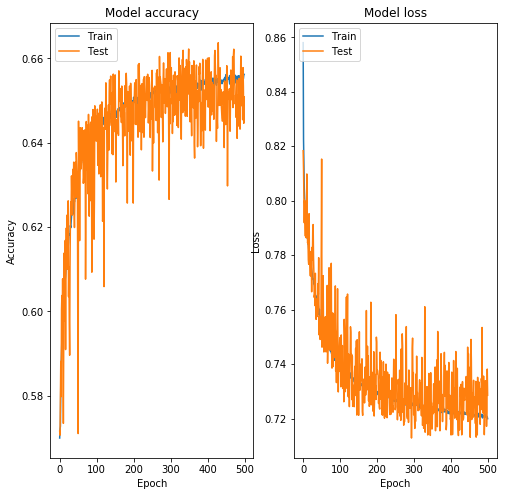

In [21]:
fig = plt.figure(figsize=(8,8))

plt.subplot(1,2,1)
# Plot training & validation accuracy values
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1,2,2)
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [22]:
#model.evaluate(X_val, y_val)

In [23]:
def one_hot_to_int(arr):
    return np.argmax(arr, axis=1)+1

In [24]:
result = model.predict(X_test)
result = one_hot_to_int(result)
result = result.reshape(result.shape[0],1)

In [25]:
bld_id = test_vals['building_id'].values
bld_id = bld_id.reshape(bld_id.shape[0],1)
res_df = pd.DataFrame(np.concatenate((bld_id,result),axis=1), columns = ['building_id', 'damage_grade'])
res_df.to_csv('results.csv')

In [26]:
model.save('Ritcher_prediction.h5')